## [통계적머신러닝] 과제8
통계학과 2019150419 기다연<br>
2021.10.26

### 문제1.
Wine data를 이용해 MDS, local MDS, LLE, Isomap, t-SNE의 성능을 비교하라. (각 차원축소 기법 적용한 뒤에 로지스틱 회귀 적용)

### 1. 단순 Logistic

In [54]:
# wine data 불러오기 (12개의 특성변수 존재)
import pandas as pd
dat_wine=pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/'
                     'wine/wine.data',header=None) # wine data 불러오기
dat_wine.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [55]:
from sklearn.model_selection import train_test_split
X,y=dat_wine.iloc[:,1:].values, dat_wine.iloc[:,0].values

# 단위에 따라 예민하는 PCA이므로, 변수들을 잘 측정하고 PCA의 accuracy를 높이기 위해서는 Scaling 작업을 해준다.
# Scaling을 해줌으로써 단위를 맞추게 되고, PCA의 성능이 높아진다.
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
X_std=std.fit_transform(X)

In [32]:
X.shape

(178, 13)

In [33]:
y.shape

(178,)

In [35]:
X_std.shape

(178, 13)

In [34]:
# 모든 성분 관찰 (13개의 주성분 모두 고려)
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

pca=PCA(n_components=None)
X_pca=pca.fit_transform(X_std)
print(pca.explained_variance_ratio_)

[0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823
 0.04238679 0.02680749 0.02222153 0.01930019 0.01736836 0.01298233
 0.00795215]


In [38]:
lr=LogisticRegression()
lr.fit(X_pca, y)
y_pre_pca=lr.predict(X_pca)

from sklearn import metrics
print("Accuracy(Original):", metrics.accuracy_score(y, y_pre_pca))

Accuracy(Original): 1.0


In [83]:
# PCA를 통해 차원 축소 후 로지스틱 회귀 (모든 특성변수 사용)
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

lr=LogisticRegression()
lpca = PCA(n_components=None)
X_train_pca = lpca.fit_transform(X_train_std)  # train data에 대해서 fit_transform
X_test_pca = lpca.transform(X_test_std)  # test data에 대해서 transform (fit할 수 없음.)
lr.fit(X_train_pca, y_train)
y_train_pre=lr.predict(X_train_pca)
y_test_pre=lr.predict(X_test_pca)

from sklearn import metrics
print("Train Accuracy(Original):", metrics.accuracy_score(y_train, y_train_pre))
print("Test Accuracy(Original):", metrics.accuracy_score(y_test, y_test_pre))
print("Confusion matrix \n", confusion_matrix(y_test_pre, y_test))

Train Accuracy(Original): 1.0
Test Accuracy(Original): 0.9814814814814815
Confusion matrix 
 [[18  0  0]
 [ 0 20  0]
 [ 0  1 15]]


### 2. MDS
: Multidimensional Scaling, 다차원축소

MDS와 t-SNE는 test data에 대한 transform 함수를 제공해주지 않는다. (차원축소는 전체 데이터에 차원축소기법을 적용해야 한다.)

In [37]:
# PCA를 통해 차원 축소 후 로지스틱 회귀 (2개의 주성분으로 압축)
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import MDS

mds = MDS(n_components=2, random_state=1)
X_std_mds = mds.fit_transform(X_std)  # X data에 대해서 fit_transform
lr=LogisticRegression()
lr.fit(X_std_mds, y)
y_pre_mds=lr.predict(X_std_mds)

from sklearn import metrics
print("Accuracy(MDS):", metrics.accuracy_score(y, y_pre_mds))

Accuracy(MDS): 0.9157303370786517


In [47]:
# Train/test data로 나누어서 분석 진행
mds = MDS(n_components=2, random_state=10)
X_m = mds.fit_transform(X_std) # trainsform > split
X_train, X_test, y_train,y_test = train_test_split(X_m, y, test_size=0.3, random_state=1, stratify=y)
print(X_train.shape, X_test.shape)

(124, 2) (54, 2)


In [48]:
import warnings
warnings.filterwarnings(action='ignore')
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model= LogisticRegression() 
model.fit(X_train, y_train)

train_pred = model.predict(X_train)
pred = model.predict(X_test)
print("Train accuracy:", accuracy_score(train_pred, y_train))
print("Test accuracy:", accuracy_score(pred, y_test))
print("Confusion matrix \n", confusion_matrix(pred, y_test))

Train accuracy: 0.9193548387096774
Test accuracy: 0.8703703703703703
Confusion matrix 
 [[16  5  0]
 [ 2 16  0]
 [ 0  0 15]]


[]

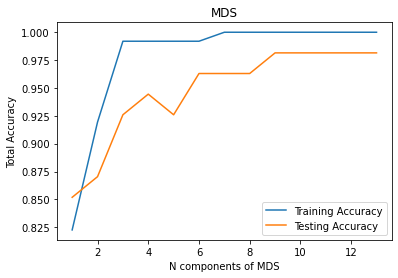

In [52]:
# Observe changing accuracy over n_components
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

c_list = [1,2,3,4,5,6,7,8,9,10,11,12,13]

train_errors = [] 
test_errors = [] 

# Conduct standard scaling
X,y=dat_wine.iloc[:,1:].values, dat_wine.iloc[:,0].values
std=StandardScaler()
X_std=std.fit_transform(X)

for x in c_list:
    mds = MDS(n_components=x, random_state=10)
    X_m = mds.fit_transform(X_std) # transform > split
    X_train, X_test, y_train,y_test = train_test_split(X_m, y, 
                                                   test_size=0.3, random_state=1, stratify=y)
    model= LogisticRegression() 
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    pred = model.predict(X_test)
    
    train_errors.append(accuracy_score(y_train, train_pred))
    test_errors.append(accuracy_score(y_test, pred))

x = np.arange(len(c_list)) + 1 # Create domain for plot
plt.plot(x, train_errors, label='Training Accuracy') # Plot training error over domain
plt.plot(x, test_errors, label='Testing Accuracy') # Plot testing error over domain
plt.xlabel('N components of MDS') # Label x-axis
plt.ylabel('Total Accuracy') # Label y-axis
plt.legend() # Show plot labels as legend
plt.title('MDS')
plt.plot() # Show graph

### 3. Local MDS
: KNN(평면을 따라가는 방법)을 직선으로 가정해 MDS를 적용한 기법

### 4. LLE
: Locally Linear Embedding, 선형결합한 뒤 차원축소 진행

In [70]:
# PCA를 통해 차원 축소 후 로지스틱 회귀 (2개의 주성분으로 압축)
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_neighbors=100, n_components=2, method='modified')
X_std_lle = lle.fit_transform(X_std)  # X data에 대해서 fit_transform
lr=LogisticRegression()
lr.fit(X_std_lle, y)
y_pre_lle=lr.predict(X_std_lle)

from sklearn import metrics
print("Accuracy(LLE):", metrics.accuracy_score(y, y_pre_lle))

Accuracy(LLE): 0.8651685393258427


In [71]:
# Train/test data로 나누어서 분석 진행
lle = LocallyLinearEmbedding(n_neighbors=100, n_components=2, method='modified')
X_m = lle.fit_transform(X_std) # trainsform > split
X_train, X_test, y_train,y_test = train_test_split(X_m, y, test_size=0.3, random_state=1, stratify=y)
print(X_train.shape, X_test.shape)

(124, 2) (54, 2)


In [72]:
import warnings
warnings.filterwarnings(action='ignore')
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model= LogisticRegression() 
model.fit(X_train, y_train)

train_pred = model.predict(X_train)
pred = model.predict(X_test)
print("Train accuracy:", accuracy_score(train_pred, y_train))
print("Test accuracy:", accuracy_score(pred, y_test))
print("Confusion matrix \n", confusion_matrix(pred, y_test))

Train accuracy: 0.8306451612903226
Test accuracy: 0.7962962962962963
Confusion matrix 
 [[16  1  0]
 [ 2 20  8]
 [ 0  0  7]]


[]

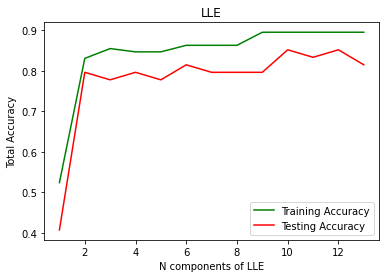

In [74]:
# Observe changing accuracy over n_components
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

c_list = [1,2,3,4,5,6,7,8,9,10,11,12,13]

train_errors = [] 
test_errors = [] 

# Conduct standard scaling
X,y=dat_wine.iloc[:,1:].values, dat_wine.iloc[:,0].values
std=StandardScaler()
X_std=std.fit_transform(X)

for x in c_list:
    lle = LocallyLinearEmbedding(n_neighbors=100, n_components=x, method='modified', random_state=14)
    X_m = lle.fit_transform(X_std) # transform > split
    X_train, X_test, y_train,y_test = train_test_split(X_m, y, 
                                                   test_size=0.3, random_state=1, stratify=y)
    model= LogisticRegression() 
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    pred = model.predict(X_test)
    
    train_errors.append(accuracy_score(y_train, train_pred))
    test_errors.append(accuracy_score(y_test, pred))

x = np.arange(len(c_list)) + 1 # Create domain for plot
plt.plot(x, train_errors, label='Training Accuracy', color='green') # Plot training error over domain
plt.plot(x, test_errors, label='Testing Accuracy', color='red') # Plot testing error over domain
plt.xlabel('N components of LLE') # Label x-axis
plt.ylabel('Total Accuracy') # Label y-axis
plt.legend() # Show plot labels as legend
plt.title('LLE')
plt.plot() # Show graph

### 5. Isomap
: 지도면 상의 최소거리를 이용한 manifold 학습방식

In [64]:
# PCA를 통해 차원 축소 후 로지스틱 회귀 (2개의 주성분으로 압축)
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import Isomap

iso = Isomap(n_neighbors=100, n_components=2)
X_std_iso = iso.fit_transform(X_std)  # X data에 대해서 fit_transform
lr=LogisticRegression()
lr.fit(X_std_iso, y)
y_pre_iso=lr.predict(X_std_iso)

from sklearn import metrics
print("Accuracy(Isomap):", metrics.accuracy_score(y, y_pre_iso))

Accuracy(Isomap): 0.9606741573033708


In [66]:
# Train/test data로 나누어서 분석 진행
iso = Isomap(n_neighbors=100, n_components=2)
X_m = iso.fit_transform(X_std) # trainsform > split
X_train, X_test, y_train,y_test = train_test_split(X_m, y, test_size=0.3, random_state=1, stratify=y)
print(X_train.shape, X_test.shape)

(124, 2) (54, 2)


In [67]:
import warnings
warnings.filterwarnings(action='ignore')
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model= LogisticRegression() 
model.fit(X_train, y_train)

train_pred = model.predict(X_train)
pred = model.predict(X_test)
print("Train accuracy:", accuracy_score(train_pred, y_train))
print("Test accuracy:", accuracy_score(pred, y_test))
print("Confusion matrix \n", confusion_matrix(pred, y_test))

Train accuracy: 0.9596774193548387
Test accuracy: 0.9814814814814815
Confusion matrix 
 [[18  1  0]
 [ 0 20  0]
 [ 0  0 15]]


[]

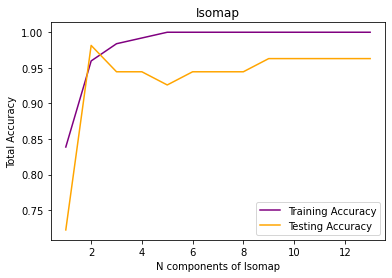

In [69]:
# Observe changing accuracy over n_components
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

c_list = [1,2,3,4,5,6,7,8,9,10,11,12,13]

train_errors = [] 
test_errors = [] 

# Conduct standard scaling
X,y=dat_wine.iloc[:,1:].values, dat_wine.iloc[:,0].values
std=StandardScaler()
X_std=std.fit_transform(X)

for x in c_list:
    iso = Isomap(n_neighbors=100, n_components=x)
    X_m = iso.fit_transform(X_std) # transform > split
    X_train, X_test, y_train,y_test = train_test_split(X_m, y, 
                                                   test_size=0.3, random_state=1, stratify=y)
    model= LogisticRegression() 
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    pred = model.predict(X_test)
    
    train_errors.append(accuracy_score(y_train, train_pred))
    test_errors.append(accuracy_score(y_test, pred))

x = np.arange(len(c_list)) + 1 # Create domain for plot
plt.plot(x, train_errors, label='Training Accuracy', color='purple') # Plot training error over domain
plt.plot(x, test_errors, label='Testing Accuracy', color='orange') # Plot testing error over domain
plt.xlabel('N components of Isomap') # Label x-axis
plt.ylabel('Total Accuracy') # Label y-axis
plt.legend() # Show plot labels as legend
plt.title('Isomap')
plt.plot() # Show graph

### 6. t-SNE
: 2개의 관측치간의 유사성을 정규분포의 상대비율로 정의한 기법

In [76]:
# PCA를 통해 차원 축소 후 로지스틱 회귀 (2개의 주성분으로 압축)
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=40)
X_std_tsne = tsne.fit_transform(X_std)  # X data에 대해서 fit_transform
lr=LogisticRegression()
lr.fit(X_std_tsne, y)
y_pre_tsne=lr.predict(X_std_tsne)

from sklearn import metrics
print("Accuracy(t-SNE):", metrics.accuracy_score(y, y_pre_tsne))

Accuracy(t-SNE): 0.9831460674157303


In [77]:
# Train/test data로 나누어서 분석 진행
tsne = TSNE(n_components=2, perplexity=40)
X_m = tsne.fit_transform(X_std) # trainsform > split
X_train, X_test, y_train,y_test = train_test_split(X_m, y, test_size=0.3, random_state=1, stratify=y)
print(X_train.shape, X_test.shape)

(124, 2) (54, 2)


In [78]:
import warnings
warnings.filterwarnings(action='ignore')
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model= LogisticRegression() 
model.fit(X_train, y_train)

train_pred = model.predict(X_train)
pred = model.predict(X_test)
print("Train accuracy:", accuracy_score(train_pred, y_train))
print("Test accuracy:", accuracy_score(pred, y_test))
print("Confusion matrix \n", confusion_matrix(pred, y_test))

Train accuracy: 0.9354838709677419
Test accuracy: 0.9259259259259259
Confusion matrix 
 [[17  2  0]
 [ 1 18  0]
 [ 0  1 15]]


[]

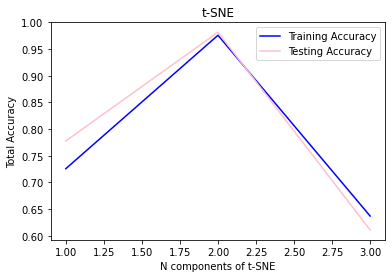

In [81]:
# Observe changing accuracy over n_components
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

c_list = [1,2,3]

train_errors = [] 
test_errors = [] 

# Conduct standard scaling
X,y=dat_wine.iloc[:,1:].values, dat_wine.iloc[:,0].values
std=StandardScaler()
X_std=std.fit_transform(X)

for x in c_list:
    tsne = TSNE(n_components=x, perplexity=40)
    X_m = tsne.fit_transform(X_std) # transform > split
    X_train, X_test, y_train,y_test = train_test_split(X_m, y, 
                                                   test_size=0.3, random_state=1, stratify=y)
    model= LogisticRegression() 
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    pred = model.predict(X_test)
    
    train_errors.append(accuracy_score(y_train, train_pred))
    test_errors.append(accuracy_score(y_test, pred))

x = np.arange(len(c_list)) + 1 # Create domain for plot
plt.plot(x, train_errors, label='Training Accuracy', color='blue') # Plot training error over domain
plt.plot(x, test_errors, label='Testing Accuracy', color='pink') # Plot testing error over domain
plt.xlabel('N components of t-SNE') # Label x-axis
plt.ylabel('Total Accuracy') # Label y-axis
plt.legend() # Show plot labels as legend
plt.title('t-SNE')
plt.plot() # Show graph

### 문제2.
t-SNE에서 perplexity의 영향을 논의하라.<br>
위 그래프를 통해 optimal n_components of t-SNE가 2라는 것을 알 수 있었으며, n_components=2로 설정하고 perplexity에 따른 변화를 관찰했다.

[]

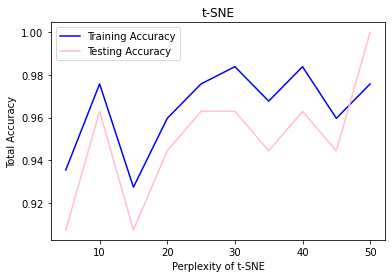

In [86]:
# Observe changing accuracy over n_components
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

c_list = [5,10,15,20,25,30,35,40,45,50]

train_errors = [] 
test_errors = [] 

# Conduct standard scaling
X,y=dat_wine.iloc[:,1:].values, dat_wine.iloc[:,0].values
std=StandardScaler()
X_std=std.fit_transform(X)

for x in c_list:
    tsne = TSNE(n_components=2, perplexity=x)
    X_m = tsne.fit_transform(X_std) # transform > split
    X_train, X_test, y_train,y_test = train_test_split(X_m, y, 
                                                   test_size=0.3, random_state=1, stratify=y)
    model= LogisticRegression() 
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    pred = model.predict(X_test)
    
    train_errors.append(accuracy_score(y_train, train_pred))
    test_errors.append(accuracy_score(y_test, pred))

x = c_list # Create domain for plot
plt.plot(x, train_errors, label='Training Accuracy', color='blue') # Plot training error over domain
plt.plot(x, test_errors, label='Testing Accuracy', color='pink') # Plot testing error over domain
plt.xlabel('Perplexity of t-SNE') # Label x-axis
plt.ylabel('Total Accuracy') # Label y-axis
plt.legend() # Show plot labels as legend
plt.title('t-SNE')
plt.plot() # Show graph

In [98]:
# Visualize t-SNE with changing perplexity
from bokeh.models import ColumnDataSource, Div
from bokeh.plotting import figure, output_notebook, show, output_file

output_notebook()

def draw_figure(coordinates, index2word, title):
    TOOLTIPS=[
        ("word", "@word"),
        ("x", "@x"),
        ("y", "@y")
    ]

    source = ColumnDataSource(data=dict(word=[], x=[], y=[]))
    source.data = dict(
        word=index2word,
        x=coordinates[:,0].reshape(-1).tolist(),
        y=coordinates[:,1].reshape(-1).tolist()
    )

    p = figure(plot_height=600, plot_width=600, title=title, tooltips=TOOLTIPS)
    p.circle(
        x="x",
        y="y",
        source=source,
        size=5,
        line_color='firebrick',
        fill_color='firebrick',
        fill_alpha=0.3
    )
    return p

Loading BokehJS ...

In [102]:
from sklearn.manifold import TSNE

plots = []
perplexity = [2, 10, 30, 40, 100, 200]
for p in perplexity:
    z = TSNE(
        n_components=2,
        perplexity=p
    ).fit_transform(X_std)
    title = 't-SNE with perplexity = {}'.format(p)
    plots.append(draw_figure(z, y, title))

gp = gridplot([[plots[0], plots[1]], [plots[2], plots[3]], [plots[4], plots[5]]])
show(gp)